In [1]:
# [실습] : www.naver.com, www.daum.net , www.yahoo.com 에서 li태그 목록 정보
# 불러와 출력해보세요.. 
# [추가] => new중 하나를 선택해서 주요 기사 내용을 출력하세요!!!

In [2]:
# request, BeautifulSoup4 모듈 사용
import urllib.request                # 원격지 서버 파일 요청
from bs4 import BeautifulSoup        # html 파싱

url1 = 'http://www.naver.com'   # 접속할 주소
url2 = 'http://www.yahoo.com'
url3 = 'https://finance.daum.net/'
url4 = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101'

url5 = 'https://news.daum.net/'


res = urllib.request.urlopen(url5)    # 응답 객체
res.geturl()                    # 접속 url주소를 반환
data = res.read()               # 객체 데이터를 읽어 data 변수 저장

type(data)
# utf-8 디코딩
src = data.decode('utf-8')

# html 파싱 - BeautifulSoup
html = BeautifulSoup(src,'html.parser')

li_tags = html.find_all('li')
for li in li_tags:
    if li.string:
        print("li tag 내용 : ", li.string)

a_tags = html.find_all('a')
for a in a_tags:
    if a.string:
        print("a tag 내용 : ", a.string)




li tag 내용 :  연예
li tag 내용 :  스포츠
li tag 내용 :  홈
li tag 내용 :  사회
li tag 내용 :  정치
li tag 내용 :  경제
li tag 내용 :  국제
li tag 내용 :  문화
li tag 내용 :  IT
li tag 내용 :  연재
li tag 내용 :  포토
li tag 내용 :  팩트체크
a tag 내용 :  본문 바로가기
a tag 내용 :  메뉴 바로가기
a tag 내용 :  연예
a tag 내용 :  스포츠
a tag 내용 :  홈
a tag 내용 :  사회
a tag 내용 :  정치
a tag 내용 :  경제
a tag 내용 :  국제
a tag 내용 :  문화
a tag 내용 :  IT
a tag 내용 :  연재
a tag 내용 :  포토
a tag 내용 :  팩트체크
a tag 내용 :  
                                    JP 모건 CEO "금리 인상과 전쟁 여파, 전례 없는 위기 올 수도"
                                
a tag 내용 :  
                                    "공항 미어터진단다"..훨훨 나는 항공주 지금 사도 되나
                                
a tag 내용 :  
                                    "배달비 부담 못참겠다"..배달앱 이용자 3개월간 107만명 줄어
                                
a tag 내용 :  
                                    한·호주 FTA 공동위 개최..IPEF 공조방안 협의
                                
a tag 내용 :  
                                    민주-국힘-정의당은 여성정치발전비를 어디에 썼나 [스크롤스토리]
                                

In [7]:
# request, BeautifulSoup4 모듈 사용
import urllib.request                # 원격지 서버 파일 요청
from bs4 import BeautifulSoup        # html 파싱

url = 'https://news.daum.net/'


res = urllib.request.urlopen(url)    # 응답 객체
res.geturl()                    # 접속 url주소를 반환
data = res.read()               # 객체 데이터를 읽어 data 변수 저장

type(data)
# utf-8 디코딩
src = data.decode('utf-8')

# html 파싱 - BeautifulSoup
html = BeautifulSoup(src,'html.parser')


crawling_data = []

i = 0
a_tags = html.select('.tit_g > a')
for a in a_tags:
    if a.string:
        #print(f"a tag 내용[{i}] : ", a.string.strip())
        crawling_data.append(a.string.strip())
        i+=1
print("=========crawling_result=========")
print(crawling_data)
print(type(crawling_data))

# crawling_data.txt로 저장하세요.... (data/crawling_data.txt로 저장)
# text save : object -> file(string) -> load(string)
file = open("data/crawling_data.txt",'a',encoding='utf-8')
for wr in crawling_data:
    file.write(wr+"\n")  # 저장한 문자열.... 
file.close()

## pickle 
# -import pickle을 통해서 모뮬 임포트가 필요함. 
# -pickle 모듈을 이용하면 원하는 데이터를 자료형의 변경없이 파일로
# 그대로 저장하여 그대로 로드하여 사용이 가능함.
# -pickle로 데이터를 저장하거나 불러올 때는 파일을 바이트형식으로 읽거나 써야 한다
# -wb로 데이터를 입력하는 경우, 확장자는 .bin을 사용하는게 좋다.
# -모든 파이썬 데이터 객체를 저장하고 읽을 수 있다
# 
#  저장(save)
#  pickle.dump(data, file)  -> data 저장한 소스 데이터 버퍼, 
#                             file은 저장할 위치(파일)
# 
#  예) import pickle        # 저장
#      list = [1,2,3,4,5]
#      with open('list.bin','wb') as f:
#        picke.dump(list, f)
#      (원) file = open('list.bin','wb')
#           list = [1,2,3,4,5]
#           pickle.dump(list,file)
#           file.close()
# 
#  예)로드 var = pickle.load(file)
#      import pickle
#      with open('list.bin','rb') as f:
#         var = pickle.load(f) 
#      #

import pickle

# save
with open("data/data.pickle1",'wb') as file:
    pickle.dump(crawling_data,file)
print("pickle save")
# load
with open("data/data.pickle1","rb") as file:
    crawling_data = pickle.load(file)
print(f"pickle load\n{crawling_data}")



=========crawling_result=========
['조국 "문재인 정부는 \'촛불 혁명\'의 산물, \'정치적 민주주의\' 안착 시켜"', '젤렌스키 "안보리 회의서 민간인 학살 완전한 조사 촉구"', "압류된 러 재벌 '호화 요트'..유지비만 수백억 '애물단지'", '헝가리 남부서 열차·트럭 충돌로 사상자 발생', '윤석열 "비서실장, 국민 잘 모실 유능한 분으로..장제원 내정은 근거 없어"', '김은혜·김태흠·이철규, 지방선거 뒤흔든 윤심 3인방', "'짝퉁' 논란 승기 잡은 네이버 크림, 수익성 개선 속도낸다", '"대우조선 37년째 다니는 부사장이 사장 되는 게 알박기인가"', "조정식 '여론조사 대신 국민경선' 제안..다른 후보들 '시큰둥'", '우크라이나 인권변호사 "부차가 충격과 공포라면 마리우폴은 지옥"[영상]', "횡성군, 도시민의 귀농귀촌 길라잡이 '동네작가·멘토단' 운영", '대학총장 이어 처장 만난 인수위.."고등교육재정 확보 시급"', '중국, 캔시노 코로나 리보핵산 백신 임상 승인', '"인간이 원초적으로 가장 끌리는 향기는 바닐라"', 'SCMP "상하이 사실상 무기한 전면봉쇄 돌입"', '방역지침 완화에 기업들 \'출근 모드\'로?.."시기상조" 우려도', '"마침내 \'암각화 물고문\' 끝낸다"..대구-구미 13년 물싸움 끝', "만 18세도 주민투표..'제2 강형욱' 육성 위한 자격제 도입", '국가채무 2000조 넘었는데 50조 추경 예고..쌈짓돈 7조뿐', "'한라봉 횡단보도'에 어린이 통학로까지..어린이 사랑이 근정포장  영예로", '[뉴스외전 이슈+] "법인카드 유용 의혹, 증거 신속한 확보가 중요"', "[특파원 리포트] 우크라이나 취재기① '2박 3일'의 전쟁 취재와 외교부의 후진적 언론관", '부정으로 얼룩진 참담한 대선결과 [천주교정의구현사제단 연구]', "[박은주의 돌발] 김건희를 '제2의 김정숙' 만드는 사람들", '[오마이포토] 휠체어 장애인 고려한 발언대 앞 최혜영 의원', "[취재썰] 어머니를

In [3]:
import pickle        # 저장
list = [1,2,3,4,5]
with open('list.bin','wb') as f:
    pickle.dump(list,f)
    

In [4]:
import pickle        # 불러오기
with open('list.bin','rb') as f:
    data = pickle.load(f)
print(data)

[1, 2, 3, 4, 5]


In [8]:
### 단어 빈도수 
# 특정 문서의 자료를 토대로 단어들의 출현 빈도수를 이용하여 해당 문서의 특징
# 경향을 분석하는 방법을 토픽분석이라고 한다. 
# #

import pickle

# pickle data file load
file = open("data/data.pickle1", mode="rb")
news_data2 = pickle.load(file)

# print(news_data2)
# 텍스트 전처리
import re

def clean_text(text_string):
    # 문장부호 제거
    text_string_re = re.sub(
        '[,.?!:\'\"]',
        '',
        text_string)   #sub(패턴, 변경단어, 변경할자료)
    # 특수문자, 숫자 재거
    text_string_re = re.sub(
        '[!@#$%^&*()]|[0-9]',
        '',
        text_string_re)
    # 영문 소문자 -> 영문 제거
    text_string_re = text_string_re.lower()
    text_string_re = re.sub('[a-z]', '', text_string_re)
    # 공백 제거
    text_string_re = ' '.join(text_string_re.split())
    
    return text_string_re

## 텍스트 전처리 함수 호출
clean_texts = [clean_text(row) for row in news_data2]
print(">> 텍스트 전처리 결과 <<")
print(clean_texts)

## word count
word_count = {}

for text in clean_texts: # 텍스트 -> 문장
    for word in text.split():  # 문장 -> 단어
        word_count[word] = word_count.get(word, 0) + 1
print(">> 위드 카운트 <<")
print(word_count)

## 단어 전처리 
# 불용 단어 제거 
#del word_count['[바로잡습니다]']

# 3회 이상 출력 단어 & 2 ~ 4자 단어 지정
new_word_count = {}
for word,cnt in word_count.items():
    if cnt >= 3 and len(word) >=2 and len(word) < 4:
        print(word, '-->', word_count[word])
        new_word_count[word] = new_word_count.get(word,cnt)
print(">>단어 전처리<<")
print(new_word_count)

## top word Counter
from collections import Counter  # 모듈을 추가
counter = Counter(new_word_count)
top5_word = counter.most_common(5) # top 5
print(">>top 5<<")
print(top5_word)



>> 텍스트 전처리 결과 <<
['조국 문재인 정부는 촛불 혁명의 산물 정치적 민주주의 안착 시켜', '젤렌스키 안보리 회의서 민간인 학살 완전한 조사 촉구', '압류된 러 재벌 호화 요트유지비만 수백억 애물단지', '헝가리 남부서 열차·트럭 충돌로 사상자 발생', '윤석열 비서실장 국민 잘 모실 유능한 분으로장제원 내정은 근거 없어', '김은혜·김태흠·이철규 지방선거 뒤흔든 윤심 인방', '짝퉁 논란 승기 잡은 네이버 크림 수익성 개선 속도낸다', '대우조선 년째 다니는 부사장이 사장 되는 게 알박기인가', '조정식 여론조사 대신 국민경선 제안다른 후보들 시큰둥', '우크라이나 인권변호사 부차가 충격과 공포라면 마리우폴은 지옥[영상]', '횡성군 도시민의 귀농귀촌 길라잡이 동네작가·멘토단 운영', '대학총장 이어 처장 만난 인수위고등교육재정 확보 시급', '중국 캔시노 코로나 리보핵산 백신 임상 승인', '인간이 원초적으로 가장 끌리는 향기는 바닐라', '상하이 사실상 무기한 전면봉쇄 돌입', '방역지침 완화에 기업들 출근 모드로시기상조 우려도', '마침내 암각화 물고문 끝낸다대구-구미 년 물싸움 끝', '만 세도 주민투표제 강형욱 육성 위한 자격제 도입', '국가채무 조 넘었는데 조 추경 예고쌈짓돈 조뿐', '한라봉 횡단보도에 어린이 통학로까지어린이 사랑이 근정포장 영예로', '[뉴스외전 이슈+] 법인카드 유용 의혹 증거 신속한 확보가 중요', '[특파원 리포트] 우크라이나 취재기① 박 일의 전쟁 취재와 외교부의 후진적 언론관', '부정으로 얼룩진 참담한 대선결과 [천주교정의구현사제단 연구]', '[박은주의 돌발] 김건희를 제의 김정숙 만드는 사람들', '[오마이포토] 휠체어 장애인 고려한 발언대 앞 최혜영 의원', '[취재썰] 어머니를 보내고 모든 가족이 장기기증 택한 이유', '시신 상온 방치 그 뒤에도 숨긴 관들원인은 부실 점검 [취재파일]', '아시아 여성 명 잇따라 폭행한 美 대 남성 검찰이 기소', '김신조 루트 북악산 남측면 개방 文 대통령 부

In [ ]:
## 자료 시각화 (matplotlib 패키지 설치)
# pip install matplotlib 으로 설치하세용!!!

In [6]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 899.5/899.5 KB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


['대통령']
[3]
선 그래프


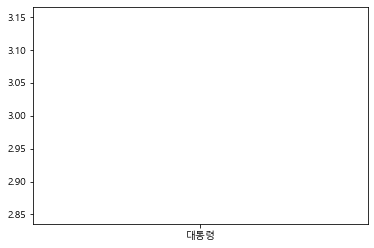

막대 그래프


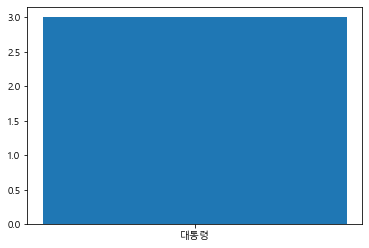

원형 차트


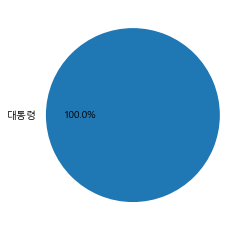

In [12]:
# 1. 단어와 출현 빈도수 만들기 
words = []       # 단어
counts = []     # 출현 빈도수

# print(top5_word)
for word, count in top5_word:
    words.append(word)
    counts.append(count)

print(words)
print(counts) 

## pyplot 모듈을 import => plt로 별칭 사용
import matplotlib.pyplot as plt

## 차트에서 한글 지원
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(
    fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 선 그래프
print('선 그래프')
plt.plot(words,counts)
plt.show()

## 막대 그래프
print('막대 그래프')
plt.bar(words, counts)
plt.show()

##원형 그래프 :  pie()
print('원형 차트')
plt.pie(counts,labels=words,autopct='%.1f%%')
plt.show()

In [8]:
# DataBase 사용

# SQLlite3는 기기 내부에서만 사용할 수 있는 DBMS이다.

# - 주로 모바일이나 소형 기기에서 관계형 데이터베이스를 생성해주는 소프트웨어
# - 생성된 DB는 외부에서 접근을 허용하지 않음
# - 파이썬은 SQLite3기본으로 제공하고 있어 제약없이 import하여 사용할 수 있음.
# 
# #테이블 생성
# Create table [if not exists] table-name(
#     column-name data-type-name column-constraint,
#     ...
# )
# ##data-type
# TEXT : 문자형 ex) TEXT(size)
# NUMBERIC : 숫자형 ex) NUMBERIC(size)
# Integer : 정수형
# REAL : 실수형
# BLOB : 대용량 자료
# ##제약조건
# PRIMARY KEY : 기본키
# UNIQUE : 중복 불가
# NOT NULL : 생략 불가
# CHECK : 제한 조건
# DEFAULT : 기본값
# 
# CRUD ->Create(Insert), Read(Select),Update(Update),Delete(Delete)
# SQLite3 사용 예시
# 모듈 import#
# #
import sqlite3

#확인
print(sqlite3.sqlite_version_info)

try:
    # DB 연동
    conn=sqlite3.connect('data/sqlite_db')  #DB 생성 ->연결 객체
    # SQL실행 객체
    cursor=conn.cursor()
    #table생성
    # sql='create table if not exists test_table (name text(10),phone text(15),addr text(50))'
    # cursor.execute(sql)
    ##레코드 추가
    # cursor.execute("insert into test_table values('홍길동','010-1111-1111','산골짜기')")
    # cursor.execute("insert into test_table values('이순신','010-1111-1119','해남')")
    # cursor.execute("insert into test_table values('강감찬','010-1212-1111','평양')")
    # cursor.execute("insert into test_table values('이성계','010-1118-1118','개성')")
    # conn.commit()

    #레코드 조회
    cursor.execute("select * from test_table")
    rows=cursor.fetchall()      #조회 레코드 읽기
    #출력 1
    for row in rows:
        print(row)
    print("이름\t 전화번호      \t 주소")
    for row in rows:
        print(row[0],'\t',row[1],'\t',row[2])
    #메뉴 사용 다음코드 작성(1.출력,2.수정,3.삭제,0.종료)
    #name을 입력 받아서 정보 수정 코드 작성
    #name을 입력 받아서 삭제 코드 작성
    while True:
        choice=int(input("1.출력 2. 수정 3.삭제, 0.종료 >> "))
        name=input("이름을 입력하세요 : ")
        if choice==1:
            sql2=f"select * from test_table where name='{name}'"
            rows2=cursor.execute(sql2)
            for row in rows2:
                print(row)
        elif choice==2:
            tel=input("새번호 입력 : ")
            addr=input("새주소 입력 : ")
            sql3=f"update test_table set phone='{tel}', addr='{addr}'"
            cursor.execute(sql3)
            conn.commit()
        elif choice==3:
            sql4=f"delete from test_table where name='{name}'"
            cursor.execute(sql4)
            conn.commit()
        else:
            break
        
except Exception as e:
    print('db연동 에러 : ',e)
    conn.rollback()
finally:
    cursor.close()
    conn.close()


(3, 37, 2)
('홍길동', '010-4444-4444', '서울시')
('이순신', '010-4444-4444', '서울시')
('강감찬', '010-4444-4444', '서울시')
('이성계', '010-4444-4444', '서울시')
이름	 전화번호      	 주소
홍길동 	 010-4444-4444 	 서울시
이순신 	 010-4444-4444 	 서울시
강감찬 	 010-4444-4444 	 서울시
이성계 	 010-4444-4444 	 서울시
('홍길동', '010-4444-4444', '서울시')
db연동 에러 :  invalid literal for int() with base 10: ''
